In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
import os

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
for df in (X_train_full, X_test, y_train_full, y_test):
    print(df.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[100]]

'Pullover'

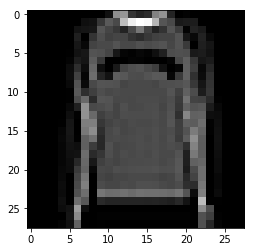

In [8]:
plt.imshow(X_train[0], cmap='gray')
plt.imshow(X_train[5], cmap='gray')
plt.imshow(X_train[100], cmap='gray')

In [9]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.BatchNormalization(),
keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
keras.layers.BatchNormalization(),
keras.layers.Activation("elu"),
keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
keras.layers.Activation("elu"),
keras.layers.BatchNormalization(),
keras.layers.Dense(10, activation="softmax")
])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 300)               235200    
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30000     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
__________

In [11]:
keras.utils.plot_model(model)

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(lr=0.05),
             metrics=['accuracy'])

In [13]:
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

In [14]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [15]:
history = model.fit(X_train, y_train, epochs=50,
                   validation_data=(X_valid, y_valid),
                   callbacks = [checkpoint_cb, early_stopping_cb, tensorboard_cb])

Train on 55000 samples, validate on 5000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
55000/55000 [==============================] - 8s 138us/sample - loss: 0.4872 - acc: 0.8242 - val_loss: 0.3755 - val_acc: 0.8656
Epoch 2/50
55000/55000 [==============================] - 7s 136us/sample - loss: 0.3817 - acc: 0.8626 - val_loss: 0.3462 - val_acc: 0.8700
Epoch 3/50
55000/55000 [==============================] - 7s 128us/sample - loss: 0.3482 - acc: 0.8724 - val_loss: 0.3197 - val_acc: 0.8858
Epoch 4/50
55000/55000 [==============================] - 7s 126us/sample - loss: 0.3237 - acc: 0.8825 - val_loss: 0.3138 - val_acc: 0.8854
Epoch 5/50
55000/55000 [==============================] - 7s 127us/sample - loss: 0.3049 - acc: 0.8879 - val_loss: 0.3261 - val_acc: 0.8796
Epoch 6/50
55000/55000 [==============================] - 7s 129us/sample - loss: 0.2904 - acc: 0.8934 - val_loss: 0.3015 - val_acc: 0.8916
Epoch 7/50
55000/55000 [==============================] - 7s 13

<function matplotlib.pyplot.show(*args, **kw)>

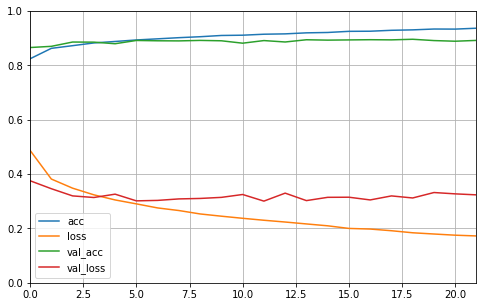

In [16]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

## REGRESSION USING SEQUENTIAL

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

I0604 14:48:25.747327 140057040791296 california_housing.py:114] Downloading Cal. housing from https://ndownloader.figshare.com/files/5976036 to /home/sahilsharma/scikit_learn_data


In [23]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [24]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs = 20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
print(model.predict(X_test[3:]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 34us/sample - loss: 899251415812038852608.0000 - val_loss: 250093025068318720.0000
Epoch 2/20
11610/11610 [==============================] - 0s 27us/sample - loss: 132147200960434736.0000 - val_loss: 58462042566164480.0000
Epoch 3/20
11610/11610 [==============================] - 0s 26us/sample - loss: 30890897804850208.0000 - val_loss: 13666165020753412.0000
Epoch 4/20
11610/11610 [==============================] - 0s 29us/sample - loss: 7221096631152765.0000 - val_loss: 3194623520391295.0000
Epoch 5/20
11610/11610 [==============================] - 0s 25us/sample - loss: 1688013917572368.5000 - val_loss: 746778494801211.8750
Epoch 6/20
11610/11610 [==============================] - 0s 25us/sample - loss: 394592296998689.3750 - val_loss: 174568173031570.0625
Epoch 7/20
11610/11610 [==============================] - 0s 27us/sample - loss: 92240511923737.4844 - val_loss: 4080732

In [25]:
mse_test

253949.93442344962

## WIDE AND DEEP

In [41]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

In [43]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_36 (Dense)                (None, 30)           270         input_12[0][0]                   
__________________________________________________________________________________________________
dense_37 (Dense)                (None, 30)           930         dense_36[0][0]                   
__________________________________________________________________________________________________
concatenate_11 (Concatenate)    (None, 38)           0           input_12[0][0]                   
                                                                 dense_37[0][0]             

In [45]:
# model.compile(loss="mean_squared_error", optimizer="sgd")
# history = model.fit(X_train, y_train, epochs = 20, validation_data=(X_valid, y_valid))
# mse_test = model.evaluate(X_test, y_test)
# print(model.predict(X_test[3:]))